#Projeto Final

**Análise Exploratória de Dados**


📌 Efetuar uma análise exploratória de dados (EDA, exploratory data
analysis) a partir de uma base de dados de livre escolha do grupo.



# Importação das Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do Dataset

In [ ]:
df = pd.read_csv("Airline Dataset Updated.csv")

In [ ]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


# Análise Descritiva

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
df.dtypes

Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object

In [ ]:
df.shape

(98619, 15)

In [ ]:
df.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


# Insights

## Análise de distribuição de idades.

O primeiro gráfico que apresentamos é um histograma que mostra a distribuição
das idades dos passageiros.

*   Utilizamos a biblioteca seaborn para criar este gráfico, que é uma extensão da biblioteca matplotlib e oferece visualizações estatísticas mais atraentes.

*   O eixo x representa as idades dos passageiros, enquanto o eixo y representa a frequência ou contagem de passageiros em cada intervalo de idade.

* Optamos por adicionar uma estimativa de densidade do kernel (KDE) para suavizar a distribuição.





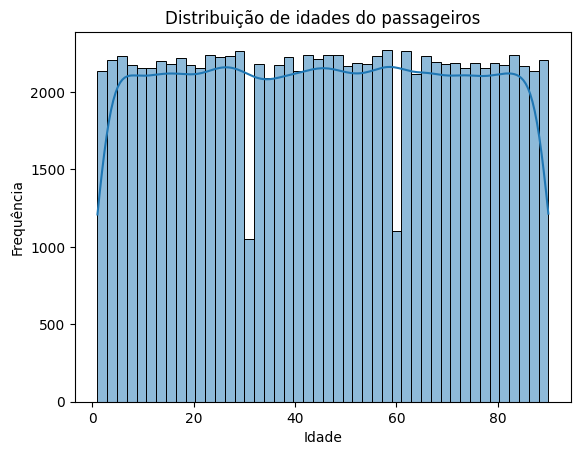

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de idades do passageiros')
plt.show()

## Comparação de idades por gênero

O segundo gráfico é um boxplot que compara as idades dos passageiros por gênero.


*   Utilizamos novamente a biblioteca seaborn para criar este gráfico, pois ela oferece uma maneira simples e elegante de visualizar distribuições de dados complexas.
*   No gráfico, cada caixa (box) representa a distribuição das idades para cada gênero, mostrando os quartis, a mediana e os possíveis outliers.

* Optamos por mostrar a média de idade para cada gênero para fornecer uma visão comparativa rápida.





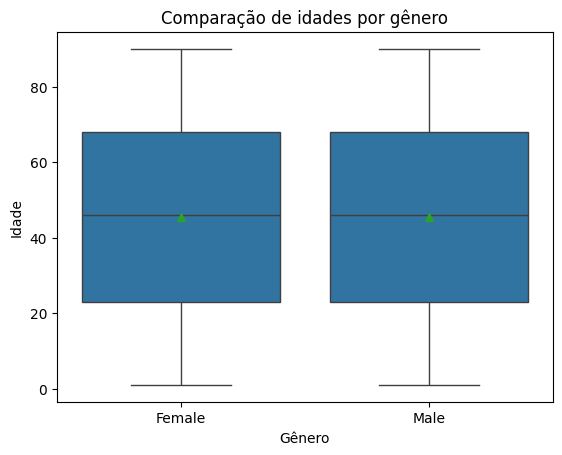

In [ ]:
sns.boxplot(
    x = "Gender",
    y = "Age",
    showmeans=True,
    data=df
)

plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.title('Comparação de idades por gênero')
plt.show()

## Distribuição de passageiros por continente de origem

O terceiro gráfico é um gráfico de pizza que mostra a distribuição dos passageiros por continente de partida.


*   Utilizamos a biblioteca matplotlib para criar este gráfico simples, onde cada fatia representa a proporção de passageiros que partiram de um determinado continente.
*   Optamos por exibir as porcentagens de cada fatia para facilitar a compreensão da distribuição dos passageiros globalmente.





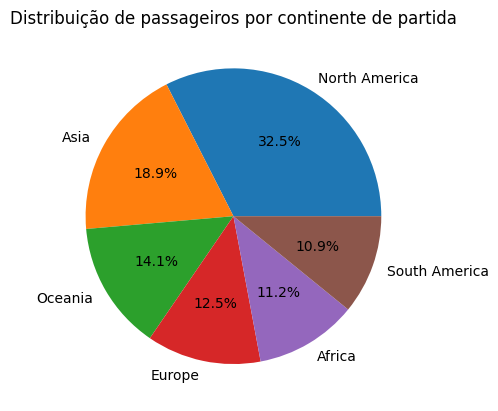

In [ ]:
continents_counts = df['Continents'].value_counts()

df_pie = pd.DataFrame({
    'Continente': continents_counts.index,
    'Quantidade': continents_counts.values
})

plt.pie(df_pie['Quantidade'], labels=df_pie['Continente'], autopct='%1.1f%%')
plt.title('Distribuição de passageiros por continente de partida')
plt.show()


## Número de voos por piloto

O quarto gráfico é um gráfico de barras que apresenta os top 10 pilotos com mais voos.

*   Utilizamos a biblioteca matplotlib para criar este gráfico, pois é uma das ferramentas mais comuns e versáteis para visualizações em Python.
*   Optamos por exibir os nomes dos pilotos no eixo x e o número de voos no eixo y para destacar visualmente os pilotos mais ativos.





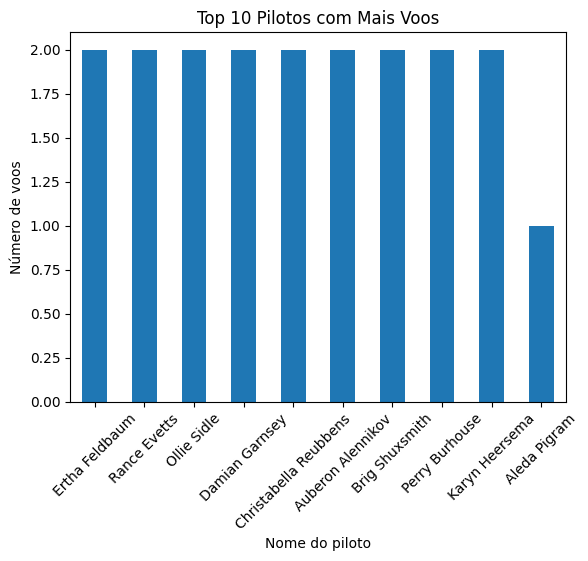

In [ ]:
pilot_counts = df['Pilot Name'].value_counts().sort_values(ascending=False)
top_10_pilots = pilot_counts.head(10)

top_10_pilots.plot(kind='bar')
plt.xlabel('Nome do piloto')
plt.ylabel('Número de voos')
plt.title('Top 10 Pilotos com Mais Voos')
plt.xticks(rotation=45)
plt.show()

## Top 10 Nacionalidades dos Passageiros

O quinto gráfico é outro gráfico de barras que mostra as top 10 nacionalidades dos passageiros.

*   Utilizamos novamente a biblioteca matplotlib para criar este gráfico, seguindo o mesmo padrão do gráfico anterior.
*   Optamos por exibir as nacionalidades no eixo x e o número de passageiros no eixo y para identificar as nacionalidades mais comuns entre os passageiros.





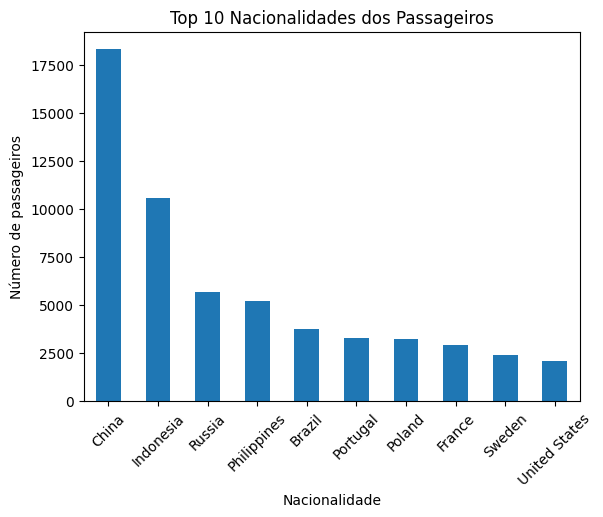

In [ ]:
nationality_counts = df['Nationality'].value_counts().sort_values(ascending=False)
top_10_nationalities = nationality_counts.head(10)

top_10_nationalities.plot(kind='bar')
plt.xlabel('Nacionalidade')
plt.ylabel('Número de passageiros')
plt.title('Top 10 Nacionalidades dos Passageiros')
plt.xticks(rotation=45)
plt.show()

## Distribuição dos Voos por Status

O último gráfico é outro gráfico de pizza que ilustra a distribuição dos voos por status.


*   Utilizamos a biblioteca matplotlib para criar este gráfico simples e eficaz.
*   Optamos por exibir as porcentagens de cada status de voo para entender rapidamente a distribuição dos voos quanto ao seu status.





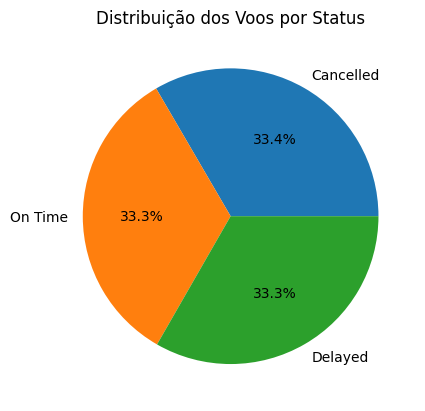

In [ ]:
status_counts = df['Flight Status'].value_counts()

df_pie = pd.DataFrame({
    'Status': status_counts.index,
    'Quantidade': status_counts.values
})

plt.pie(df_pie['Quantidade'], labels=df_pie['Status'], autopct='%1.1f%%')
plt.title('Distribuição dos Voos por Status')
plt.show()